In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# equation of quadratic function
def f(x):
    return 3*x**2 - 4*x + 5

In [ ]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

Text(0, 0.5, 'Loss')

Text(0, 0.5, 'Loss')

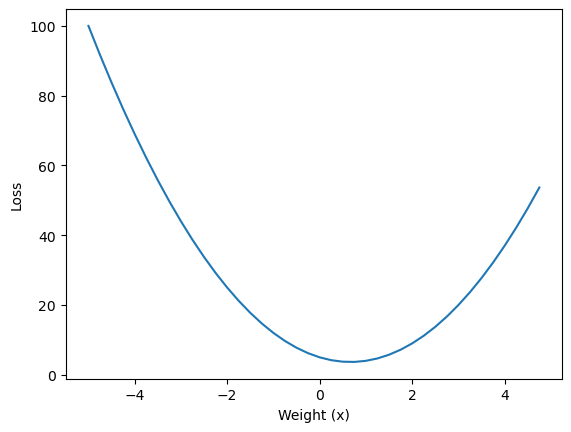

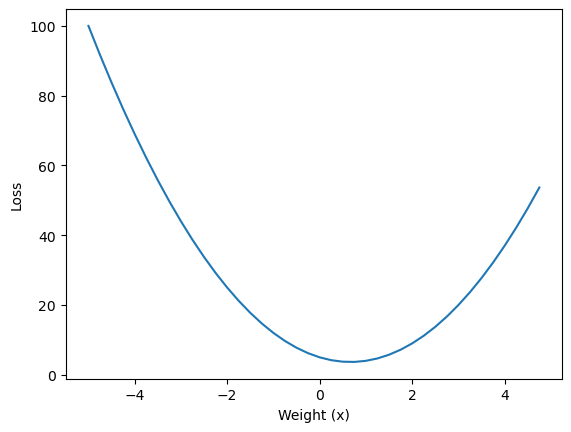

In [ ]:
ys = f(xs)
plt.plot(xs, ys)
plt.xlabel("Weight (x)")
plt.ylabel("Loss")

In [ ]:
h = 0.000001
x = -3
(f(x + h) - f(x))/h

-21.999997002808414

-21.999997002808414

In [ ]:
f(x)

44

44

In [ ]:
# 3*x**2 - 4*x + 5
# 3*2*x - 4
#substitute x - 3*2*3 - 4 = 14 - slope of the equation at X =3

In [ ]:
# lets take another function!
# input weights
a = 2.0
b = -3.0
c = 10.0

# output is d, it is the output of the NN
d = a*b + c
print(d)


4.0
4.0


In [ ]:
#change with respect to a
h = 0.001

# inputs
a = 2.0
b = -3.0
c = 10.0


d1 = a*b + c #f(x)
a += h
d2 =  a*b + c #f(x + h) : h here is added to just a

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h) # (f(x+h) - f(x))/h


d1 4.0
d2 3.997
slope -3.0000000000001137
d1 4.0
d2 3.997
slope -3.0000000000001137


In [ ]:
# d/da = 1*b + 0 = b
# d/db = 1*a + 0 = a
# d/dc = 0 + 1 = 1

In [ ]:
#change with respect to b
h = 0.001

# inputs
a = 2.0
b = -3.0
c = 10.0


d1 = a*b + c #f(x)
b += h
d2 =  a*b + c #f(x + h) : h here is added to just a

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h) # (|f(x+h) - f(x))/h


d1 4.0
d2 4.002
slope 1.9999999999997797
d1 4.0
d2 4.002
slope 1.9999999999997797


In [ ]:
#change with respect to c
h = 0.001

# inputs
a = 2.0
b = -3.0
c = 10.0


d1 = a*b + c #f(x)
c += h
d2 =  a*b + c #f(x + h) : h here is added to just a

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h) # (|f(x+h) - f(x))/h


d1 4.0
d2 4.0009999999999994
slope 0.9999999999994458
d1 4.0
d2 4.0009999999999994
slope 0.9999999999994458


#### With the above output we can prove that the slope of a variable with respect to function can be calculated by using the formula (f(x + h) - f(x))/h

### Build Classes to host the variables and their derivative values

In [ ]:
class Value:
    def __init__(self, data, _children=(), label='', _op=''):
        self.data = data
        self.label = label
        self._prev = set(_children)
        self._op = _op
        self.grad = 0.0
        self._backward = lambda:None


    def __repr__(self):
        return f"Value(Data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other) ,_op= '+' )
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), _op= '*')
        return out



In [ ]:
a = Value(2.0); a.label='a'
b = Value(-3.0); b.label = 'b'
c = Value(10, label='c')

e = a*b; e.label = 'e'
d = e + c; d.label='d'

f = Value(-2.0, label='f')
L = d*f; L.label='L'

In [ ]:
# !pip install graphviz

In [ ]:
from graphviz import Digraph

def trace(root):

  # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')

        if n._op:
          # if this value is a result of some operation, create an op node for it
          dot.node(name = uid + n._op, label = n._op)
          # and connect this node to it
          dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [ ]:
# d = a*b + c; d.label='d'
# L = d * f

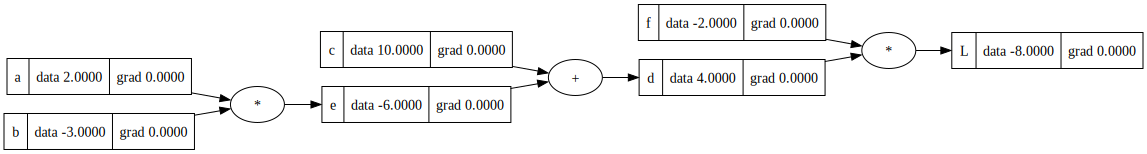

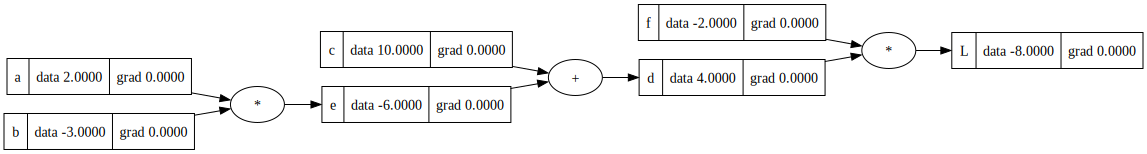

In [ ]:
draw_dot(L)